# CDMX: Regresion Lineal Multiple

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [42]:
df = pd.read_csv('listings - CDMX_clean.csv')
df = df.drop(columns=['Unnamed: 0'])
df.head()

,id,host_id,source,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,...,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,44616,196253,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,S/D,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus offers independent studios and ...,...,0.0,0.0,4.58,4.56,4.70,4.87,4.78,4.98,4.48,0.41
1,67703,334451,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",S/D,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",...,4.0,0.0,4.90,4.81,4.75,4.94,4.92,4.98,4.91,0.31
2,70644,212109,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",...,7.0,2.0,4.91,4.90,4.96,4.96,4.98,4.96,4.92,0.83
3,107078,540705,city scrape,NEW DESIGNER LOFT,Is the best ever place triple L <br />Location...,"Is located in the best area of Mexico City, Po...",Andrea,2011-04-27,"Mexico City, Mexico",I Leave in Mexico City... I am an Architect an...,...,0.0,0.0,4.91,5.00,5.00,5.00,4.73,4.91,4.82,0.11
4,131610,647454,previous scrape,MARIA DEL ALMA,S/D,S/D,Fernando,2011-05-31,"Mexico City, Mexico",S/D,...,0.0,0.0,4.80,4.80,4.80,4.90,4.90,4.90,4.80,1.17


### Tratamiento de los Datos

In [43]:
# ---------------------------------------------------------------------------------
# 1) Filtrar y transformar la variable "host_acceptance_rate"
#    - Primero eliminamos las filas donde "host_acceptance_rate" sea "S/D"
#    - Después, removemos el carácter "%" y convertimos la columna a tipo float
# ---------------------------------------------------------------------------------
df = df[df['host_acceptance_rate'] != 'S/D']
df['host_acceptance_rate'] = (
    df['host_acceptance_rate']
    .str.replace('%', '')
    .astype(float)
)
# ---------------------------------------------------------------------------------
# 2) Convertir la variable "host_is_superhost" a valores numéricos
#    - Sustituimos la 't' por 1 y la 'f' por 0
#    - Con astype(int), confirmamos el tipo de dato numérico entero
# ---------------------------------------------------------------------------------
df['host_is_superhost'] = (
    df['host_is_superhost']
    .replace({'t': 1, 'f': 0})
    .astype(int)
)
# ---------------------------------------------------------------------------------
# 3) Crear la columna "bathrooms" a partir de "bathrooms_text"
#    - Extraemos únicamente el número que aparece en "bathrooms_text" (puede ser decimal)
#    - Convertimos esos valores a float
#    - Eliminamos las filas que tengan valores nulos en "bathrooms" para evitar problemas
# ---------------------------------------------------------------------------------
df['bathrooms'] = (
    df['bathrooms_text']
    .str.extract(r'(\d+\.?\d*)')
    .astype(float)
)
df = df[df['bathrooms'].notnull()]

# ---------------------------------------------------------------------------------
# 4) Convertir "instant_bookable" a valores numéricos
#    - De la misma forma que con "host_is_superhost": 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
df['instant_bookable'] = (
    df['instant_bookable']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita para evitar FutureWarning
)

# ---------------------------------------------------------------------------------
# 5) Convertir "host_identity_verified" a valores numéricos
#    - Misma lógica: 't' → 1, 'f' → 0
# ---------------------------------------------------------------------------------
df['host_identity_verified'] = (
    df['host_identity_verified']
    .replace({'t': 1, 'f': 0})
    .astype(int)  # Conversión explícita
)

# ---------------------------------------------------------------------------------
# 6) Convertir la columna "property_type" a valores numéricos
#    - Cada tipo de propiedad se asocia con un código entero según el diccionario "types"
# ---------------------------------------------------------------------------------
types = {
    'Entire rental unit': 1,
    'Entire condo': 2,
    'Private room in rental unit': 3,
    'Private room in home': 4,
    'Entire loft': 5,
    'Entire serviced apartment': 6,
    'Private room in condo': 7,
    'Entire home': 8,
}

df['property_type'] = df['property_type'].replace(types)


types = {
    'Entire home/apt': 1,
    'Private room': 2,
    'Hotel room': 3,
    'Shared room': 4,
    }
df['room_type'] = df['room_type'].replace(types).astype(int)


# Conservamos los registros donde "property_type" es numérico
df = df[df['property_type'].apply(lambda x: isinstance(x, (int, float)))]

/tmp/ipykernel_1459201/1096106926.py:19: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1459201/1096106926.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace({'t': 1, 'f': 0})
/tmp/ipykernel_1459201/1096106926.py:51: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting'

In [48]:
# ---------------------------------------------------------------------------------
# 1) Seleccionar columnas numéricas del DataFrame
#    - Usando select_dtypes para filtrar solo columnas con datos numéricos
#    - Esto incluye tipos int64, float64, etc.
# ---------------------------------------------------------------------------------
dfn = df.select_dtypes(include=[np.number])
# Mostrar los nombres de las columnas resultantes
dfn.columns

Index(['id', 'host_id', 'host_acceptance_rate', 'host_is_superhost',
       'host_identity_verified', 'room_type', 'instant_bookable',
       'host_listings_count', 'host_total_listings_count', 'accommodates',
       'bedrooms', 'beds', 'price', 'minimum_nights', 'maximum_nights',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month',
       'bathrooms'],
      dtype='object')

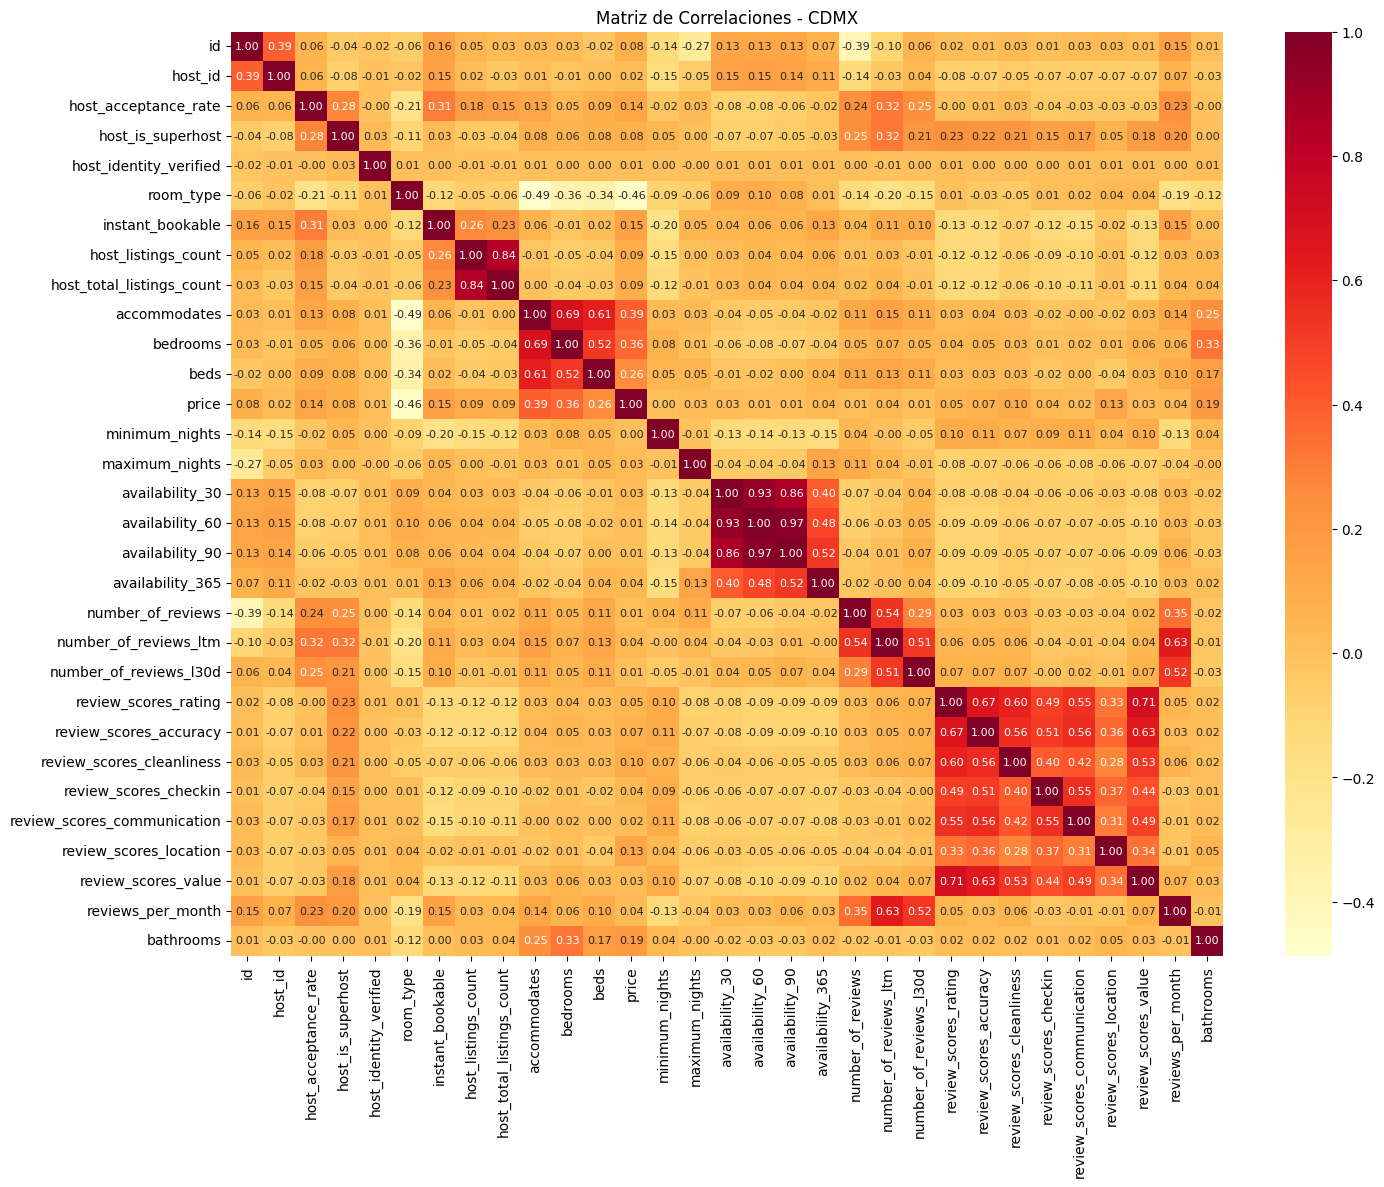

In [45]:
# Obtenemos la matriz de correlaciones
matriz = df.select_dtypes(include=[np.number])
correlaciones = matriz.corr()

plt.figure(figsize=(16, 12))                           # Configuramos tamaño de figura
sns.heatmap(correlaciones,                             # Creamos heatmap con valores anotados
            annot=True,                                # Muestra valores numéricos
            cmap='YlOrRd',                             # Usa escala de colores amarillo-rojo oscuro
            annot_kws={"size": 8},                     # Define tamaño de fuente para anotaciones
            fmt='.2f')                                 # Formatea números a 2 decimales

plt.title('Matriz de Correlaciones - CDMX')
plt.show()

## host_id

In [46]:
# ---------------------------------------------------------------------------------
# 1) Analizar las correlaciones con la variable host_id
#    - Mostramos las 6 columnas más correlacionadas positivamente
#    - Ordenamos de mayor a menor correlación usando sort_values(ascending=False)
#    - head(6) nos da solo los primeros 6 resultados
#    - Esto nos ayuda a identificar las variables más importantes para el modelo
# ---------------------------------------------------------------------------------
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_id'].sort_values(ascending=False).head(6))

# ---------------------------------------------------------------------------------
# 2) Analizar las correlaciones negativas con host_id
#    - Mostramos las 3 columnas con mayor correlación negativa
#    - Usamos ascending=True para ordenar de menor a mayor
#    - head(3) selecciona solo las primeras 3 correlaciones negativas
#    - Las correlaciones negativas son igualmente importantes que las positivas
# ---------------------------------------------------------------------------------
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_id'].sort_values(ascending=True).head(3))

# ---------------------------------------------------------------------------------
# 3) Preparar datos para el modelo de regresión lineal múltiple
#    - Seleccionamos las variables predictoras X
#    - Incluimos id como identificador único
#    - y es la variable objetivo que queremos predecir
# ---------------------------------------------------------------------------------
X = dfn[['id', 'availability_30', 'availability_60', 'instant_bookable']]
y = dfn['host_id']

# ---------------------------------------------------------------------------------
# 4) Crear y evaluar el modelo de regresión lineal múltiple
#    - LinearRegression() crea un nuevo modelo vacío
#    - fit(X, y) entrena el modelo con nuestros datos
#    - score(X, y) calcula el coeficiente de determinación R²
#    - La raíz cuadrada de R² nos da la correlación simple
#    - Esto nos permite medir qué tan bien explica nuestro modelo la variabilidad
# ---------------------------------------------------------------------------------
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_id             1.000000
id                  0.392906
availability_60     0.152329
instant_bookable    0.149603
availability_30     0.145070
availability_90     0.144687
Name: host_id, dtype: float64

------- Correlaciones Negativas -------

minimum_nights         -0.146544
number_of_reviews      -0.141123
review_scores_rating   -0.079739
Name: host_id, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.15437507955242646
Correlación: 0.3929059423735234


## host_acceptance_rate

In [49]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_acceptance_rate'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_acceptance_rate'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['number_of_reviews_ltm', 'instant_bookable', 'host_is_superhost']]
y = dfn['host_acceptance_rate']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_acceptance_rate      1.000000
number_of_reviews_ltm     0.315914
instant_bookable          0.307363
host_is_superhost         0.275010
number_of_reviews_l30d    0.249303
number_of_reviews         0.240362
Name: host_acceptance_rate, dtype: float64

------- Correlaciones Negativas -------

room_type         -0.207245
availability_30   -0.084989
availability_60   -0.083363
Name: host_acceptance_rate, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.21005317315120342
Correlación: 0.45831558248787857


## host_is_superhost

In [52]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_is_superhost'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_is_superhost'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['number_of_reviews_ltm', 'host_acceptance_rate', 'number_of_reviews', 'review_scores_rating']]
y = dfn['host_is_superhost']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_is_superhost         1.000000
number_of_reviews_ltm     0.317282
host_acceptance_rate      0.275010
number_of_reviews         0.254430
review_scores_rating      0.233657
review_scores_accuracy    0.219119
Name: host_is_superhost, dtype: float64

------- Correlaciones Negativas -------

room_type         -0.108203
host_id           -0.077307
availability_30   -0.074177
Name: host_is_superhost, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.1898761803914114
Correlación: 0.4357478403749253


## host_total_listing_count

In [54]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['host_total_listings_count'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['host_total_listings_count'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['host_listings_count', 'instant_bookable', 'host_acceptance_rate']]
y = dfn['host_total_listings_count']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

host_total_listings_count    1.000000
host_listings_count          0.840353
instant_bookable             0.233391
host_acceptance_rate         0.154712
price                        0.088034
number_of_reviews_ltm        0.044593
Name: host_total_listings_count, dtype: float64

------- Correlaciones Negativas -------

minimum_nights           -0.124101
review_scores_rating     -0.115502
review_scores_accuracy   -0.115246
Name: host_total_listings_count, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.7063715869651039
Correlación: 0.8404591524667359


## room_type

In [56]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['room_type'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['room_type'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['availability_60', 'availability_30', 'availability_90']]
y = dfn['room_type']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

room_type                 1.000000
availability_60           0.096013
availability_30           0.092417
availability_90           0.075097
review_scores_location    0.040264
review_scores_value       0.037912
Name: room_type, dtype: float64

------- Correlaciones Negativas -------

accommodates   -0.486408
price          -0.455018
bedrooms       -0.359881
Name: room_type, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.014288927797431406
Correlación: 0.11953630326152556


## accommodates

In [58]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['accommodates'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['accommodates'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['bedrooms', 'beds', 'price']]
y = dfn['accommodates']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

accommodates             1.000000
bedrooms                 0.691121
beds                     0.611510
price                    0.394814
bathrooms                0.246380
number_of_reviews_ltm    0.151436
Name: accommodates, dtype: float64

------- Correlaciones Negativas -------

room_type         -0.486408
availability_60   -0.054322
availability_90   -0.044713
Name: accommodates, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.5799487200101918
Correlación: 0.7615436428795082


## bedrooms

In [60]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['bedrooms'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['bedrooms'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['accommodates', 'beds', 'price']]
y = dfn['bedrooms']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

bedrooms          1.000000
accommodates      0.691121
beds              0.523630
price             0.363273
bathrooms         0.330935
minimum_nights    0.076519
Name: bedrooms, dtype: float64

------- Correlaciones Negativas -------

room_type         -0.359881
availability_60   -0.076847
availability_90   -0.069003
Name: bedrooms, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.502931122680502
Correlación: 0.7091763692344113


## price

In [62]:
# 1) Analizar las correlaciones con la variable
print('------- Correlaciones Positivas -------\n')
print(correlaciones['price'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['price'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['accommodates', 'bedrooms', 'beds']]
y = dfn['price']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

price               1.000000
accommodates        0.394814
bedrooms            0.363273
beds                0.262135
bathrooms           0.187874
instant_bookable    0.148350
Name: price, dtype: float64

------- Correlaciones Negativas -------

room_type         -0.455018
minimum_nights     0.003176
availability_90    0.005708
Name: price, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.17154342147387147
Correlación: 0.4141780069895932


## review_scores_value

In [63]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['review_scores_value'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['review_scores_value'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_communication']]
y = dfn['review_scores_value']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

review_scores_value            1.000000
review_scores_rating           0.708146
review_scores_accuracy         0.630746
review_scores_cleanliness      0.529426
review_scores_communication    0.492932
review_scores_checkin          0.441329
Name: review_scores_value, dtype: float64

------- Correlaciones Negativas -------

instant_bookable            -0.126202
host_listings_count         -0.119867
host_total_listings_count   -0.110596
Name: review_scores_value, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.5560373186082224
Correlación: 0.7456790989482154


## reviews_per_month

In [65]:
# 1) Analizar las correlaciones con la variable host_id
print('------- Correlaciones Positivas -------\n')
print(correlaciones['reviews_per_month'].sort_values(ascending=False).head(6))

# 2) Analizar las correlaciones negativas con host_id
print('\n------- Correlaciones Negativas -------\n')
print(correlaciones['reviews_per_month'].sort_values(ascending=True).head(3))

# 3) Preparar datos para el modelo de regresión lineal múltiple
X = dfn[['number_of_reviews_ltm', 'number_of_reviews_l30d', 'number_of_reviews']]
y = dfn['reviews_per_month']

# 4) Crear y evaluar el modelo de regresión lineal múltiple
print('\n- Modelo de Regresión Lineal Múltiple -\n')
modelo = LinearRegression()
modelo.fit(X, y)
r2 = modelo.score(X, y)
r = np.sqrt(r2)
print(f'R^2: {r2}')
print(f'Correlación: {r}')

------- Correlaciones Positivas -------

reviews_per_month         1.000000
number_of_reviews_ltm     0.625999
number_of_reviews_l30d    0.523946
number_of_reviews         0.348734
host_acceptance_rate      0.232651
host_is_superhost         0.201939
Name: reviews_per_month, dtype: float64

------- Correlaciones Negativas -------

room_type        -0.185453
minimum_nights   -0.128522
maximum_nights   -0.037883
Name: reviews_per_month, dtype: float64

- Modelo de Regresión Lineal Múltiple -

R^2: 0.44797790589595776
Correlación: 0.6693115163329836
